In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [136]:
df = pd.read_csv('spotify_songs.csv')

In [137]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [138]:
pd.isnull(df).sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [139]:
df['playlist_genre'].value_counts()

edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: playlist_genre, dtype: int64

In [140]:
#target
dict_genre = {'edm': 1, 'rap':2, 'pop':3, 'r&b':4, 'latin':5, 'rock':6}
df.replace({'playlist_genre': dict_genre}, inplace = True)
df.playlist_genre.head()

0    3
1    3
2    3
3    3
4    3
Name: playlist_genre, dtype: int64

In [141]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

In [142]:
df['year'] = df.track_album_release_date.dt.year

(array([3.000e+00, 6.900e+01, 4.110e+02, 1.193e+03, 2.894e+03, 5.398e+03,
        8.034e+03, 8.651e+03, 5.049e+03, 1.131e+03]),
 array([0.    , 0.0983, 0.1966, 0.2949, 0.3932, 0.4915, 0.5898, 0.6881,
        0.7864, 0.8847, 0.983 ]),
 <a list of 10 Patch objects>)

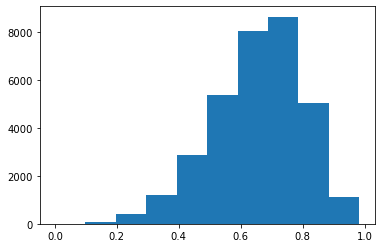

In [143]:
plt.hist(df.danceability)

(array([  67.,  242.,  566., 1321., 2691., 4276., 5836., 6877., 6623.,
        4334.]),
 array([1.750000e-04, 1.001575e-01, 2.001400e-01, 3.001225e-01,
        4.001050e-01, 5.000875e-01, 6.000700e-01, 7.000525e-01,
        8.000350e-01, 9.000175e-01, 1.000000e+00]),
 <a list of 10 Patch objects>)

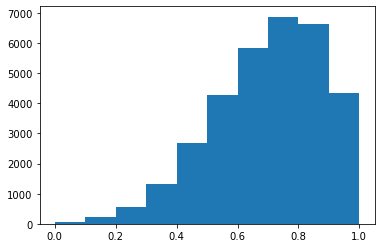

In [144]:
plt.hist(df.energy)

(array([3454.,    0., 4010.,    0., 2827.,  913., 2201., 5350., 5782.,
        8296.]),
 array([0.        , 0.24849066, 0.49698133, 0.74547199, 0.99396266,
        1.24245332, 1.49094399, 1.73943465, 1.98792532, 2.23641598,
        2.48490665]),
 <a list of 10 Patch objects>)

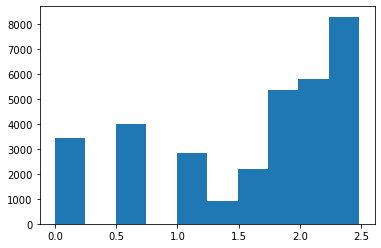

In [145]:
plt.hist(np.log(df.key +1))

(array([1.000e+00, 0.000e+00, 5.000e+00, 2.000e+00, 2.100e+01, 1.170e+02,
        1.087e+03, 6.677e+03, 2.178e+04, 3.143e+03]),
 array([-46.448 , -41.6757, -36.9034, -32.1311, -27.3588, -22.5865,
        -17.8142, -13.0419,  -8.2696,  -3.4973,   1.275 ]),
 <a list of 10 Patch objects>)

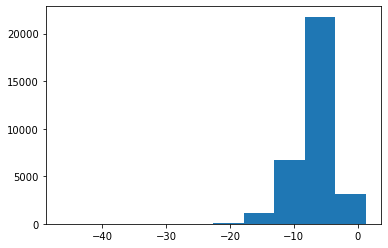

In [146]:
plt.hist(df.loudness)

(array([1.7519e+04, 7.5510e+03, 3.0010e+03, 2.3660e+03, 1.5130e+03,
        6.6700e+02, 1.5700e+02, 3.6000e+01, 1.3000e+01, 1.0000e+01]),
 array([0.        , 0.0651283 , 0.1302566 , 0.19538489, 0.26051319,
        0.32564149, 0.39076979, 0.45589808, 0.52102638, 0.58615468,
        0.65128298]),
 <a list of 10 Patch objects>)

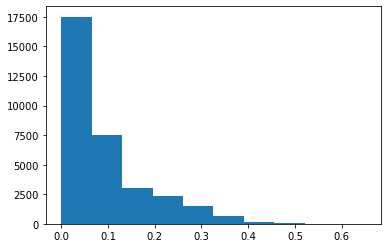

In [147]:
plt.hist(np.log(df.speechiness+1))

(array([17780.,  4963.,  3043.,  1979.,  1575.,  1122.,   850.,   656.,
          542.,   323.]),
 array([0.    , 0.0994, 0.1988, 0.2982, 0.3976, 0.497 , 0.5964, 0.6958,
        0.7952, 0.8946, 0.994 ]),
 <a list of 10 Patch objects>)

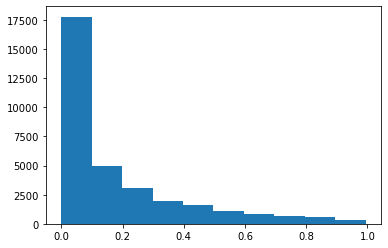

In [148]:
plt.hist(df.acousticness)

(array([28043.,   818.,   457.,   416.,   341.,   327.,   408.,   543.,
          916.,   564.]),
 array([0.    , 0.0994, 0.1988, 0.2982, 0.3976, 0.497 , 0.5964, 0.6958,
        0.7952, 0.8946, 0.994 ]),
 <a list of 10 Patch objects>)

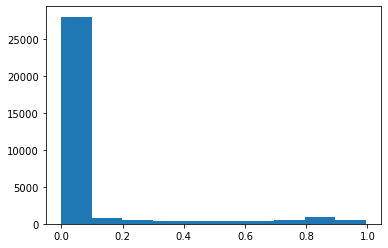

In [149]:
plt.hist(df.instrumentalness)

(array([ 9938., 12510.,  4051.,  3635.,   988.,   570.,   549.,   258.,
          185.,   149.]),
 array([0.    , 0.0996, 0.1992, 0.2988, 0.3984, 0.498 , 0.5976, 0.6972,
        0.7968, 0.8964, 0.996 ]),
 <a list of 10 Patch objects>)

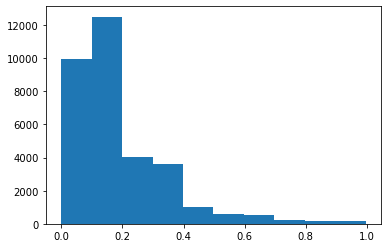

In [150]:
plt.hist(df.liveness)

(array([ 961., 2583., 3400., 4270., 4357., 4814., 4241., 3776., 2758.,
        1673.]),
 array([0.    , 0.0991, 0.1982, 0.2973, 0.3964, 0.4955, 0.5946, 0.6937,
        0.7928, 0.8919, 0.991 ]),
 <a list of 10 Patch objects>)

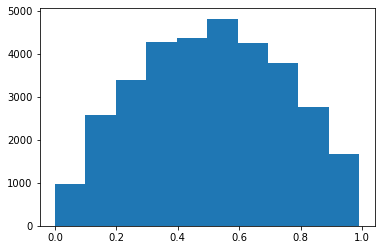

In [151]:
plt.hist(df.valence)

(array([1.0000e+00, 4.0000e+00, 1.8900e+02, 6.3210e+03, 8.3840e+03,
        1.2129e+04, 3.3170e+03, 2.1500e+03, 3.3400e+02, 4.0000e+00]),
 array([  0.   ,  23.944,  47.888,  71.832,  95.776, 119.72 , 143.664,
        167.608, 191.552, 215.496, 239.44 ]),
 <a list of 10 Patch objects>)

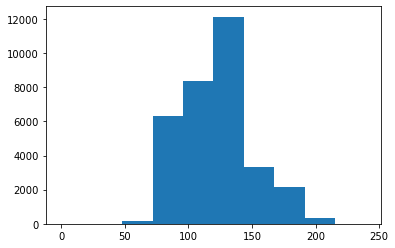

In [152]:
plt.hist(df.tempo)

(array([   21.,   244.,  2351., 11852., 11234.,  4560.,  1556.,   589.,
          257.,   169.]),
 array([  4000.,  55381., 106762., 158143., 209524., 260905., 312286.,
        363667., 415048., 466429., 517810.]),
 <a list of 10 Patch objects>)

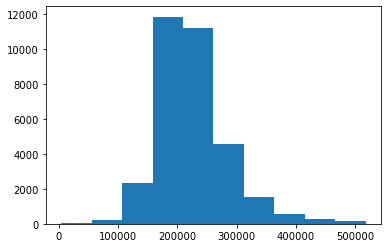

In [153]:
plt.hist(df.duration_ms)

<h3>Decision Tree</h3>

In [154]:
features = ['track_popularity', 'year', 'danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
           'liveness', 'valence', 'tempo', 'duration_ms']
data = df[features]
data.head()

,track_popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,2019,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,2019,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,2019,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,2019,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,2019,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [155]:
x = data
y = df['playlist_genre']

In [156]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, random_state = 101, stratify=y, test_size=0.25)

In [157]:
dt = DecisionTreeClassifier(random_state=10)

In [158]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [159]:
dt.score(X_train, y_train)

0.946353151397011

In [160]:
dt.score(X_valid, y_valid)

0.4554756974052869

In [161]:
dt.predict(X_valid)

array([3, 4, 3, ..., 2, 2, 3])

<h3>Max Depth</h3>

In [162]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,15):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt.fit(X_train, y_train)
    train_accuracy.append(dt.score(X_train, y_train))
    validation_accuracy.append(dt.score(X_valid, y_valid))
    
frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.281920,0.283469
1,2,0.344989,0.339384
2,3,0.416301,0.416372
3,4,0.442333,0.431965
4,5,0.468973,0.459861


No handles with labels found to put in legend.


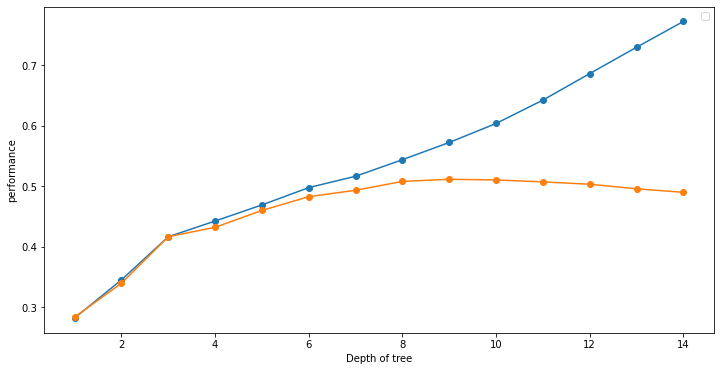

In [163]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [164]:
dt = DecisionTreeClassifier(random_state=10, max_depth=10, criterion='gini')
dt.fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_valid, y_valid)

(0.6037199480181936, 0.5102935802168351)

<h3>Reverse Feature Elimination</h3>

In [165]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = DecisionTreeClassifier(random_state=10, max_depth=10, criterion='gini')
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(x, y)

RFE(estimator=DecisionTreeClassifier(max_depth=10, random_state=10),
    n_features_to_select=1)

In [166]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = x.columns
ranking_df['Rank'] = rfe.ranking_

In [167]:
ranking_df.sort_values(by=['Rank'])

,Feature_name,Rank
12,tempo,1
1,year,2
7,speechiness,3
2,danceability,4
3,energy,5
9,instrumentalness,6
8,acousticness,7
13,duration_ms,8
11,valence,9
0,track_popularity,10


In [168]:
features = ['tempo', 'year', 'speechiness', 'danceability', 'energy', 'instrumentalness', 'acousticness', 'duration_ms']
x = df[features]
y = df['playlist_genre']

In [169]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, random_state = 101, stratify=y, test_size=0.25)

In [170]:
dt = DecisionTreeClassifier(random_state=10, max_depth=11, criterion='gini')
dt.fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_valid, y_valid)

(0.62954840805718, 0.517115361188939)

<h3>Logistic Regressor</h3>